In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [38]:
train1DataFilename = 'spamTrain1.csv'
train2DataFilename = 'spamTrain2.csv'

data1 = np.loadtxt(train1DataFilename,delimiter=',')
data2 = np.loadtxt(train2DataFilename,delimiter=',')

data = np.r_[data1,data2]
X = data[:, :-1]
y = data[:, -1]


trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [39]:
model = xgb.XGBClassifier(n_estimators=140, eval_metric='logloss', random_state=1)

imputer = SimpleImputer(missing_values=-1, strategy='mean')
trainFeatures = imputer.fit_transform(trainFeatures)
testFeatures = imputer.transform(testFeatures)

scaler = StandardScaler()
trainFeatures = scaler.fit_transform(trainFeatures)
testFeatures = scaler.transform(testFeatures)

# Use Recursive Feature Elimination to select features
# 26 chosen by maximizing auc and tpr over 50 different splits of training / test data.
n_features_to_select = 26
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe = rfe.fit(trainFeatures, trainLabels)

trainFeatures = rfe.transform(trainFeatures)
testFeatures = rfe.transform(testFeatures)

rfe_X = rfe.transform(X)

# Train the model on selected features
model.fit(trainFeatures, trainLabels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=140,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

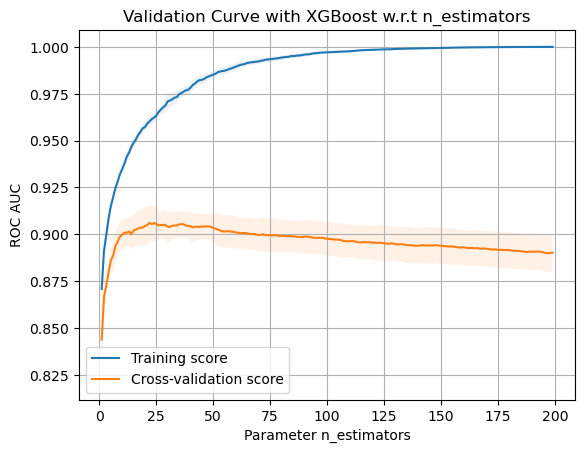

In [41]:
from sklearn.model_selection import validation_curve

param_range = range(1,200)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

val_model = xgb.XGBClassifier(eval_metric='logloss', random_state=1)

train_scores, test_scores = validation_curve(
    model, rfe_X, y, param_name="n_estimators", param_range=param_range, cv=kf, scoring="roc_auc"
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title("Validation Curve with XGBoost w.r.t n_estimators")
plt.xlabel("Parameter n_estimators")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.grid()
plt.show()

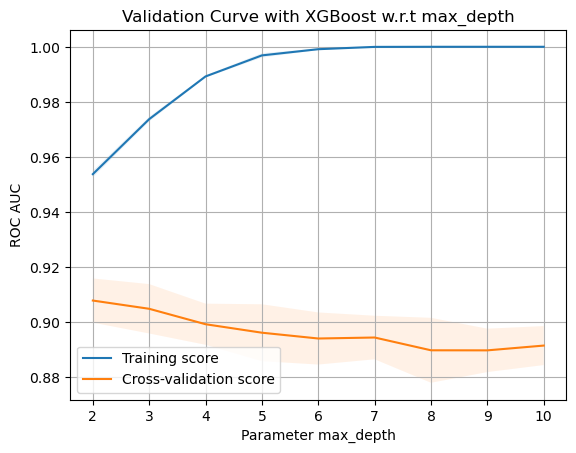

In [43]:
from sklearn.model_selection import validation_curve

param_range = range(2,11)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

val_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=1)

train_scores, test_scores = validation_curve(
    model, rfe_X, y, param_name="max_depth", param_range=param_range, cv=kf, scoring="roc_auc"
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title("Validation Curve with XGBoost w.r.t max_depth")
plt.xlabel("Parameter max_depth")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.grid()
plt.show()

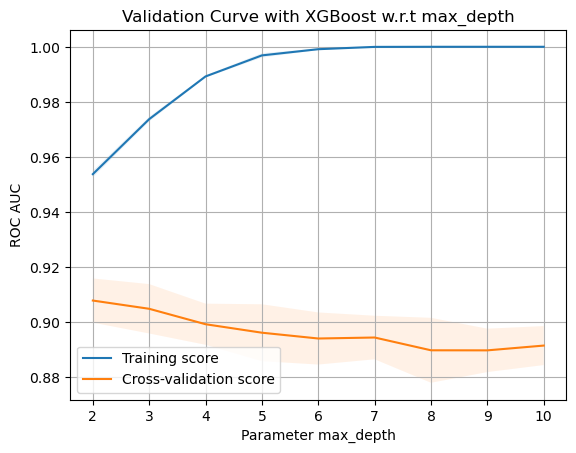

In [44]:
from sklearn.model_selection import validation_curve

param_range = range(2,11)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

val_model = xgb.XGBClassifier(n_estimators=140, eval_metric='logloss', random_state=1)

train_scores, test_scores = validation_curve(
    model, rfe_X, y, param_name="max_depth", param_range=param_range, cv=kf, scoring="roc_auc"
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title("Validation Curve with XGBoost w.r.t max_depth")
plt.xlabel("Parameter max_depth")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.grid()
plt.show()

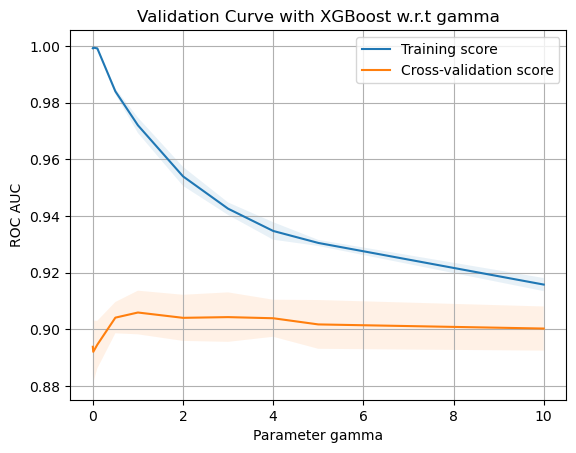

In [45]:
from sklearn.model_selection import validation_curve

param_range = [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

val_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=1)

train_scores, test_scores = validation_curve(
    model, rfe_X, y, param_name="gamma", param_range=param_range, cv=kf, scoring="roc_auc"
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title("Validation Curve with XGBoost w.r.t gamma")
plt.xlabel("Parameter gamma")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.grid()
plt.show()

AUC: 0.8986887186022398
1500


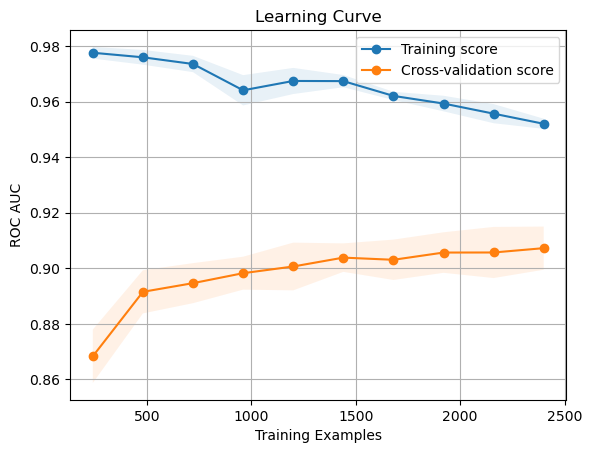

In [54]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve

kf = KFold(n_splits=5, shuffle=True, random_state=1)

model = xgb.XGBClassifier(n_estimators=100, gamma=1, max_depth = 3, eval_metric='auc', random_state=1, alpha = 0.1)

train_sizes, train_scores, test_scores = learning_curve(
    model, rfe_X, y, cv=kf, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


model.fit(trainFeatures, trainLabels)
testOutputs = model.predict_proba(testFeatures)[:,1]
aucTestRun = roc_auc_score(testLabels,testOutputs)

print(f'AUC: {aucTestRun}')
print(len(trainLabels))

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.grid()
plt.show()